In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [3]:
file_name = "/content/gdrive/MyDrive/TSU/Lab_Neural_Network/Lab2/Khabarovsk_weather.csv"

In [4]:
df = pd.read_csv(file_name, sep=';')
df.head(10)

,LocalTime,T,P0,P,U,DD
0,15.10.2020 23:30,4.0,753.6,760.5,48.0,�����
1,15.10.2020 23:00,4.0,753.6,760.5,48.0,�����
2,15.10.2020 22:30,5.0,753.6,760.5,42.0,�����
3,15.10.2020 22:00,5.0,753.6,760.5,42.0,�����
4,15.10.2020 21:30,5.0,753.6,760.5,45.0,�����
5,15.10.2020 21:00,5.0,753.6,760.5,42.0,�����
6,15.10.2020 20:30,4.0,753.6,760.5,48.0,�����
7,15.10.2020 20:00,4.0,753.6,760.5,48.0,�����
8,15.10.2020 19:30,4.0,753.6,760.5,45.0,�����
9,15.10.2020 19:00,4.0,753.6,760.5,48.0,�����


In [5]:
df.drop('DD', axis=1, inplace=True)
df.head(10)

,LocalTime,T,P0,P,U
0,15.10.2020 23:30,4.0,753.6,760.5,48.0
1,15.10.2020 23:00,4.0,753.6,760.5,48.0
2,15.10.2020 22:30,5.0,753.6,760.5,42.0
3,15.10.2020 22:00,5.0,753.6,760.5,42.0
4,15.10.2020 21:30,5.0,753.6,760.5,45.0
5,15.10.2020 21:00,5.0,753.6,760.5,42.0
6,15.10.2020 20:30,4.0,753.6,760.5,48.0
7,15.10.2020 20:00,4.0,753.6,760.5,48.0
8,15.10.2020 19:30,4.0,753.6,760.5,45.0
9,15.10.2020 19:00,4.0,753.6,760.5,48.0


In [6]:
df.describe()

,T,P0,P,U
count,119665.000000,119664.000000,119667.000000,119665.000000
mean,3.067313,751.888499,758.824175,68.904183
std,15.286499,5.818855,6.073825,20.116274
min,-35.000000,725.100000,732.000000,5.000000
25%,-11.000000,748.000000,754.600000,55.000000
50%,5.000000,751.700000,758.200000,70.000000
75%,16.000000,755.900000,762.800000,85.000000
max,35.000000,770.900000,778.500000,100.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119674 entries, 0 to 119673
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   LocalTime  119674 non-null  object 
 1   T          119665 non-null  float64
 2   P0         119664 non-null  float64
 3   P          119667 non-null  float64
 4   U          119665 non-null  float64
dtypes: float64(4), object(1)
memory usage: 4.6+ MB


array([[<Axes: title={'center': 'T'}>, <Axes: title={'center': 'P0'}>],
       [<Axes: title={'center': 'P'}>, <Axes: title={'center': 'U'}>]],
      dtype=object)

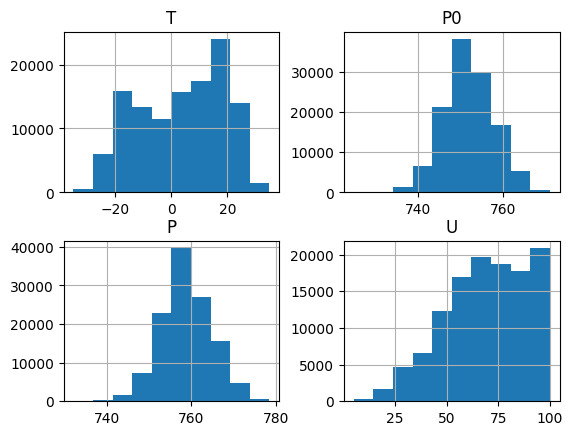

In [8]:
df.hist()

In [21]:
df = df[['LocalTime','T']]
df.head()

,LocalTime,T
0,15.10.2020 23:30,4.0
1,15.10.2020 23:00,4.0
2,15.10.2020 22:30,5.0
3,15.10.2020 22:00,5.0
4,15.10.2020 21:30,5.0


In [22]:
df.isna().sum()

LocalTime    0
T            9
dtype: int64

In [23]:
df.dropna(inplace=True)

In [24]:
df.isna().sum()

LocalTime    0
T            0
dtype: int64

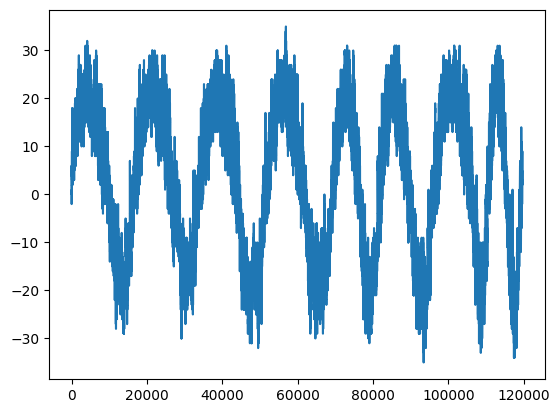

In [25]:
plt.plot(range(1,len(df['T'].values)+1),df['T'].values)

In [26]:
# Extract and normalize the target column
min_max_scaler = MinMaxScaler()
df = df['T'].values
df = min_max_scaler.fit_transform(df.reshape(-1, 1))

In [27]:
df.shape

(119665, 1)

In [28]:
# Flatten the data shape
df = df.flatten()
df.shape

(119665,)

## Split data to train, test, and validation

In [29]:
window = 15

# Calculate the number of samples for training, validation, and test sets
n_samples = df.shape[0] - window
n_train_samples = round(0.7 * n_samples)
n_val_samples = round(0.15 * n_samples)
n_test_samples = n_samples - n_train_samples - n_val_samples

print('Train = ',n_train_samples,'Validation = ',n_val_samples,'Test = ',n_test_samples)

Train =  83755 Validation =  17948 Test =  17947


In [30]:
# Function to create input-output pairs for a given set
def create_pairs(start_index, num_samples):
    X = [df[start_index + i : start_index + i + window] for i in range(num_samples)]
    y = [df[start_index + i + window] for i in range(num_samples)]
    return np.array(X), np.array(y)

In [31]:
# Create training, validation, and test sets
X_train, y_train = create_pairs(0, n_train_samples)
X_val, y_val = create_pairs(n_train_samples, n_val_samples)
X_test, y_test = create_pairs(n_train_samples + n_val_samples, n_test_samples)

In [32]:
# Reshape the data
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_val = np.reshape(X_val, (X_val.shape[0], 1, X_val.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Regressor (RNN)

In [38]:
# Build the RNN model
rnn_model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(10, activation='sigmoid', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    tf.keras.layers.Dense(1, activation='linear')
])

In [39]:
# Compile the RNN model
rnn_model.compile(loss='mse',
                  optimizer='adam',
                  metrics='mae')

In [40]:
# Train the RNN model
rnn_history = rnn_model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=20,
    validation_data=(X_val, y_val)
)

Epoch 1/10
4188/4188 [==============================] - 18s 3ms/step - loss: 0.0476 - mae: 0.1499 - val_loss: 0.0062 - val_mae: 0.0652
Epoch 2/10
4188/4188 [==============================] - 12s 3ms/step - loss: 0.0102 - mae: 0.0792 - val_loss: 0.0045 - val_mae: 0.0551
Epoch 3/10
4188/4188 [==============================] - 14s 3ms/step - loss: 0.0069 - mae: 0.0645 - val_loss: 0.0014 - val_mae: 0.0305
Epoch 4/10
4188/4188 [==============================] - 13s 3ms/step - loss: 0.0046 - mae: 0.0523 - val_loss: 9.2294e-04 - val_mae: 0.0243
Epoch 5/10
4188/4188 [==============================] - 12s 3ms/step - loss: 0.0039 - mae: 0.0477 - val_loss: 9.5814e-04 - val_mae: 0.0251
Epoch 6/10
4188/4188 [==============================] - 12s 3ms/step - loss: 0.0036 - mae: 0.0457 - val_loss: 6.6811e-04 - val_mae: 0.0203
Epoch 7/10
4188/4188 [==============================] - 13s 3ms/step - loss: 0.0034 - mae: 0.0443 - val_loss: 7.9760e-04 - val_mae: 0.0227
Epoch 8/10
4188/4188 [=================

## MSE, MAE R2

In [41]:
# Get R2, MSE, & MAE scores
y_pred = rnn_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

561/561 [==============================] - 1s 2ms/step
MSE: 0.00
MAE: 0.02
R-squared (R^2): 0.98


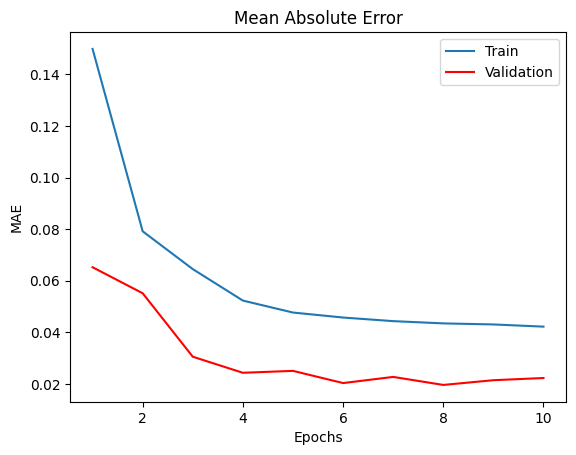

In [42]:
# Visualize the mean absolute error
mae = rnn_history.history['mae']
val_mae = rnn_history.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('Mean Absolute Error')
plt.plot(epochs,mae,label='Train')
plt.plot(epochs,val_mae,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Predict

In [43]:
# Predict using test sets
y_pred = rnn_model.predict(X_test)
y_pred_inv = min_max_scaler.inverse_transform(y_pred)
y_test_inv = min_max_scaler.inverse_transform(y_test.reshape(-1,1))

print('MAE = ',round(mean_absolute_error(y_true=y_test_inv,y_pred=y_pred_inv),3),' degrees')
print('R2-score = ',round(r2_score(y_test_inv,y_pred_inv),3))

561/561 [==============================] - 2s 3ms/step
MAE =  1.667  degrees
R2-score =  0.982


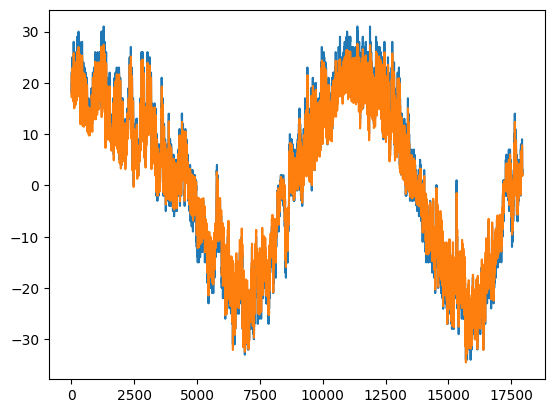

In [44]:
# Visualize prediction
plt.plot(range(1,len(y_test_inv)+1),y_test_inv)
plt.plot(range(1,len(y_pred_inv)+1),y_pred_inv)

# Регрессор (LSTM)

In [59]:
# Build the LSTM model
lstm_model = tf.keras.Sequential([
    tf.keras.layers.LSTM(10, activation='sigmoid', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    tf.keras.layers.Dense(1, activation='relu')
])

In [60]:
# Compile the LSTM model
lstm_model.compile(loss='mse',
                  optimizer='adam',
                  metrics='mae')

In [61]:
# Train the LSTM model
lstm_history = lstm_model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=20,
    validation_data=(X_val, y_val)
)

Epoch 1/10
4188/4188 [==============================] - 18s 4ms/step - loss: 0.0143 - mae: 0.0905 - val_loss: 0.0031 - val_mae: 0.0452
Epoch 2/10
4188/4188 [==============================] - 14s 3ms/step - loss: 0.0062 - mae: 0.0610 - val_loss: 0.0012 - val_mae: 0.0274
Epoch 3/10
4188/4188 [==============================] - 14s 3ms/step - loss: 0.0044 - mae: 0.0510 - val_loss: 8.3422e-04 - val_mae: 0.0228
Epoch 4/10
4188/4188 [==============================] - 15s 4ms/step - loss: 0.0037 - mae: 0.0468 - val_loss: 6.6153e-04 - val_mae: 0.0200
Epoch 5/10
4188/4188 [==============================] - 16s 4ms/step - loss: 0.0035 - mae: 0.0449 - val_loss: 6.4110e-04 - val_mae: 0.0199
Epoch 6/10
4188/4188 [==============================] - 15s 4ms/step - loss: 0.0033 - mae: 0.0438 - val_loss: 5.6690e-04 - val_mae: 0.0186
Epoch 7/10
4188/4188 [==============================] - 15s 4ms/step - loss: 0.0032 - mae: 0.0431 - val_loss: 7.2465e-04 - val_mae: 0.0217
Epoch 8/10
4188/4188 [=============

## MSE, MAE, R2

In [62]:
# Get R2, MSE, & MAE scores
y_pred = lstm_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

561/561 [==============================] - 1s 2ms/step
MSE: 0.00
MAE: 0.02
R-squared (R^2): 0.99


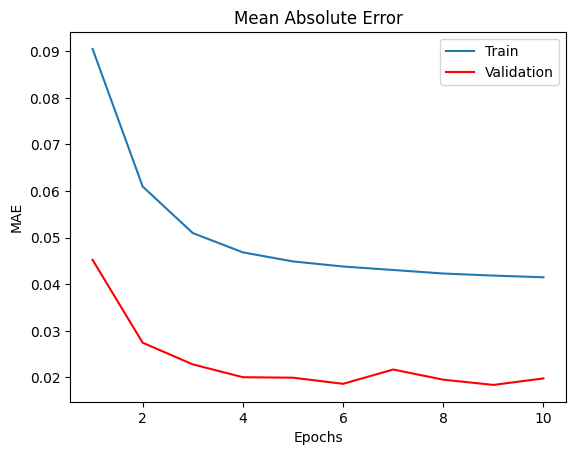

In [63]:
# Visualize the mean absolute error
mae = lstm_history.history['mae']
val_mae = lstm_history.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('Mean Absolute Error')
plt.plot(epochs,mae,label='Train')
plt.plot(epochs,val_mae,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Predict

In [64]:
# Predict using test sets
y_pred = lstm_model.predict(X_test)
y_pred_inv = min_max_scaler.inverse_transform(y_pred)
y_test_inv = min_max_scaler.inverse_transform(y_test.reshape(-1,1))

print('MAE = ',round(mean_absolute_error(y_true=y_test_inv,y_pred=y_pred_inv),3),' degrees')
print('R2-score = ',round(r2_score(y_test_inv,y_pred_inv),3))

561/561 [==============================] - 2s 3ms/step
MAE =  1.511  degrees
R2-score =  0.985


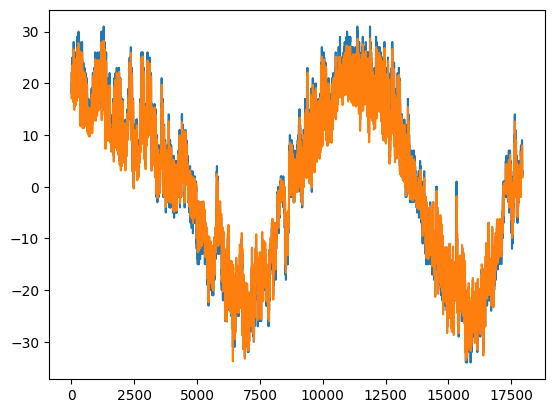

In [65]:
# Visualize prediction
plt.plot(range(1,len(y_test_inv)+1),y_test_inv)
plt.plot(range(1,len(y_pred_inv)+1),y_pred_inv)

# Regressor (LSTM 2 Layers)

In [80]:
# Build the LSTM model
lstm_model2 = tf.keras.Sequential([
    tf.keras.layers.LSTM(10, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences = True),
    Dropout(0.2),
    tf.keras.layers.LSTM(10, activation='sigmoid'),
    Dropout(0.2),
    tf.keras.layers.Dense(1, activation='relu')
])

In [81]:
# Compile the LSTM model
lstm_model2.compile(loss='mse',
                  optimizer='adam',
                  metrics='mae')

In [82]:
# Train the LSTM model
lstm_history2 = lstm_model2.fit(
    X_train,
    y_train,
    epochs=20,
    batch_size=20,
    validation_data=(X_val, y_val)
)

Epoch 1/20
4188/4188 [==============================] - 23s 5ms/step - loss: 0.0251 - mae: 0.1126 - val_loss: 0.0043 - val_mae: 0.0513
Epoch 2/20
4188/4188 [==============================] - 19s 5ms/step - loss: 0.0093 - mae: 0.0717 - val_loss: 0.0027 - val_mae: 0.0399
Epoch 3/20
4188/4188 [==============================] - 19s 4ms/step - loss: 0.0063 - mae: 0.0592 - val_loss: 0.0025 - val_mae: 0.0384
Epoch 4/20
4188/4188 [==============================] - 20s 5ms/step - loss: 0.0055 - mae: 0.0538 - val_loss: 0.0023 - val_mae: 0.0371
Epoch 5/20
4188/4188 [==============================] - 20s 5ms/step - loss: 0.0051 - mae: 0.0511 - val_loss: 0.0023 - val_mae: 0.0376
Epoch 6/20
4188/4188 [==============================] - 19s 5ms/step - loss: 0.0050 - mae: 0.0497 - val_loss: 0.0027 - val_mae: 0.0410
Epoch 7/20
4188/4188 [==============================] - 20s 5ms/step - loss: 0.0048 - mae: 0.0489 - val_loss: 0.0028 - val_mae: 0.0423
Epoch 8/20
4188/4188 [==============================] -

## MSE, MAE, R2

In [83]:
# Get R2, MSE, & MAE scores
y_pred = lstm_model2.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)

r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R-squared (R^2): {r2:.2f}")

561/561 [==============================] - 2s 3ms/step
MSE: 0.00
MAE: 0.04
R-squared (R^2): 0.95


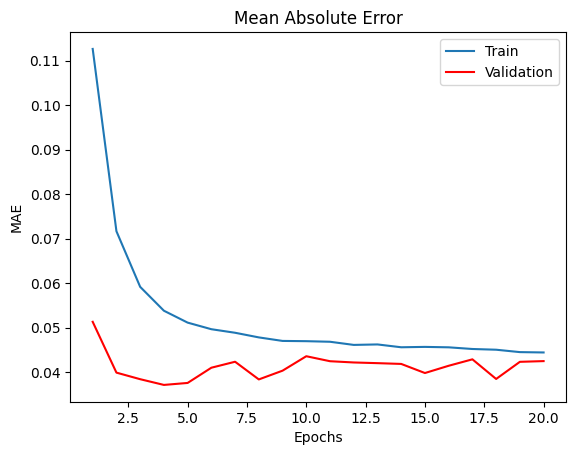

In [84]:
# Visualize the mean absolute error
mae = lstm_history2.history['mae']
val_mae = lstm_history2.history['val_mae']
epochs = range(1,len(mae)+1)

plt.title('Mean Absolute Error')
plt.plot(epochs,mae,label='Train')
plt.plot(epochs,val_mae,color='red',label='Validation')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

## Predict

In [85]:
# Predict using test sets
y_pred = lstm_model2.predict(X_test)
y_pred_inv = min_max_scaler.inverse_transform(y_pred)
y_test_inv = min_max_scaler.inverse_transform(y_test.reshape(-1,1))

print('MAE = ',round(mean_absolute_error(y_true=y_test_inv,y_pred=y_pred_inv),3),' degrees')
print('R2-score = ',round(r2_score(y_test_inv,y_pred_inv),3))

561/561 [==============================] - 1s 3ms/step
MAE =  2.737  degrees
R2-score =  0.952


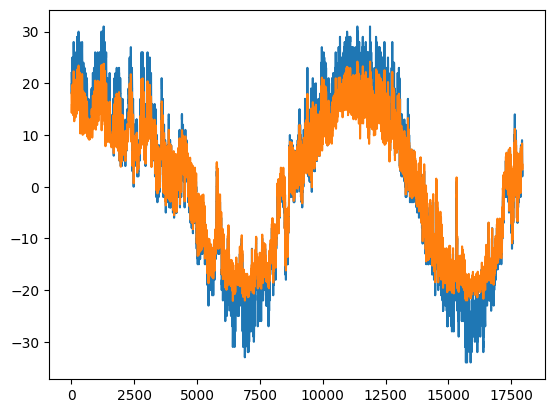

In [86]:
# Visualize prediction
plt.plot(range(1,len(y_test_inv)+1),y_test_inv)
plt.plot(range(1,len(y_pred_inv)+1),y_pred_inv)